<a href="https://colab.research.google.com/github/RohanKaushikan/CancerBioinformatics/blob/main/Rohan_kaushikan_PCATest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
source_loc = '/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/Invasive Ductal Carcinoma/New Dataset'
label_column = 'Disease_Free_Status'

## **Read the test dataset**

In [ ]:
import pandas as pd

test_data = pd.read_csv(source_loc + "/test.csv")
LABELS = list(test_data[label_column].unique())
LABELS.sort()

# factorize
test_data[label_column] = pd.factorize(test_data[label_column], sort = True)[0]

y_test = test_data[label_column]
X_test = test_data.loc[:, test_data.columns != label_column]

## **Load the model**

In [ ]:
import pickle

file_name = open(source_loc + "/best_xgb_model_pca", 'rb')
model = pickle.load(file_name)
print("Model is loaded")

Model is loaded


In [ ]:
file_name_pc = open(source_loc + "/model_pca_model", 'rb')
pca_model = pickle.load(file_name_pc)
print("Model is loaded")

Model is loaded


In [ ]:
# transform x data
X_test_pca = pca_model.transform(X_test)

## **Evaluate the performance of the model on testing dataset**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def model_evaluate(model, labels = LABELS):

    # Predicts on the testing features
    predictions = model.predict(X_test_pca)

    # Get the model accuracy
    accuracy = round(accuracy_score(y_test, predictions), 5)
    print(f'Accuracy: ', accuracy)

    # Get the classification report
    print(f'\nClassification report:\n', classification_report(y_test, predictions))

    # Plot confusion metrics
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    confusion_mat = confusion_matrix(y_test, predictions)
    sns.heatmap(confusion_mat, cmap="Blues", annot=True, xticklabels = labels, yticklabels=labels, fmt='g');
    plt.title(f'Confusion metrics', fontsize = 15)
    plt.xlabel('Predicted Labels', fontsize = 10)
    plt.ylabel('True Labels', fontsize = 10)

    plt.show()

Accuracy:  0.93434

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       180
           1       0.73      0.44      0.55        18

    accuracy                           0.93       198
   macro avg       0.84      0.71      0.76       198
weighted avg       0.93      0.93      0.93       198



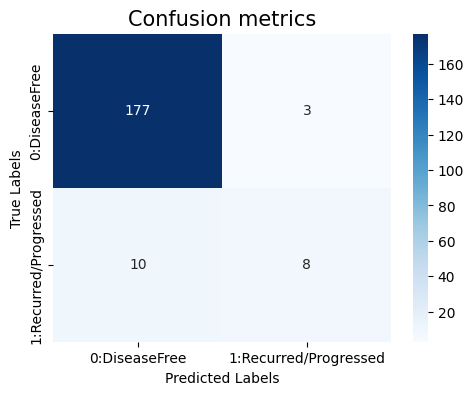

In [ ]:
model_evaluate(model)

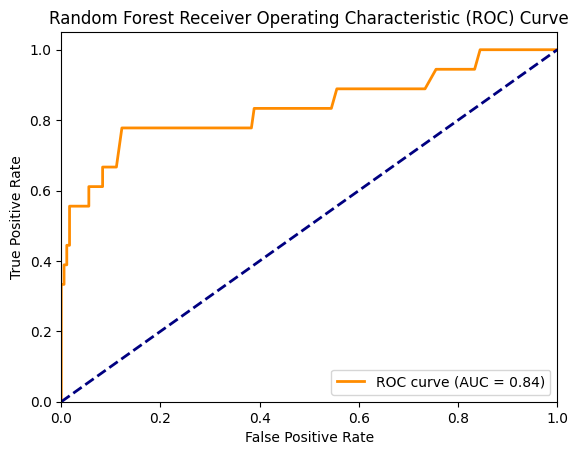

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

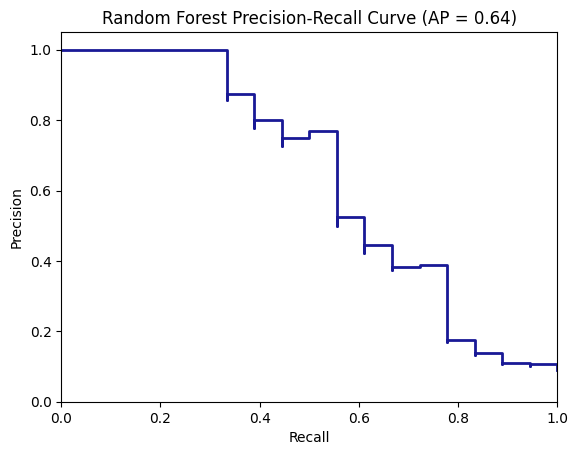

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test_pca)[:, 1]

# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, color='darkblue', lw=2, alpha=0.9, where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Random Forest Precision-Recall Curve (AP = %0.2f)' % average_precision)
plt.show()